<a href="https://colab.research.google.com/github/calebade/Python-Study-Group/blob/master/kansas_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KANSAS WELL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
!unzip '/content/drive/My Drive/KGS/1051325972.zip'

Archive:  /content/drive/My Drive/KGS/1051325972.zip
  inflating: 1051325972.las          


In [ ]:
!pip install lasio

In [ ]:
import lasio

In [ ]:
path1 = '/content/drive/My Drive/well_logs/15_9-F-1A.LAS'


In [ ]:
log1 = lasio.read(path1)

In [ ]:
log1

# Check for Log information

In [ ]:
log1.keys()  # log mnemonics

['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RHOB',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

## Visit for mnemonics:
*  https://www.apps.slb.com/cmd/ToolItem.aspx?code=DITE

* https://www.apps.slb.com/cmd/index.aspx

* http://w3.energistics.org/archive/Epicentre/Epicentre_v3.0/DataModel/LogicalDictionary/StandardValues/well_log_trace_mnemonic_mwd.html

* http://w3.energistics.org/archive/Epicentre/Epicentre_v3.0/DataModel/LogicalDictionary/StandardValues/well_log_trace_class.html#resistivity_from_attenuation

In [ ]:
# detailed well description
log1.header 

{'Curves': [CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35361,)),
  CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35361,)),
  CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35361,)),
  CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35361,)),
  CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35361,)),
  CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35361,)),
  CurveItem(mnemonic="CALI", unit="inches", valu

In [ ]:
# mnemonics description
log1.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35361,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35361,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [ ]:
# convert LASFile to pandas dataframe
log_df = log1.df()

In [ ]:
# The first five rows
log_df.head(5)

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,
145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
log_df.shape

(35361, 19)

In [ ]:
# check for the presence of null values
log_df.isna().any()

ABDCQF01     True
ABDCQF02     True
ABDCQF03     True
ABDCQF04     True
BS          False
CALI         True
DRHO         True
DT           True
DTS          True
GR           True
NPHI         True
PEF          True
RACEHM       True
RACELM       True
RHOB         True
ROP          True
RPCEHM       True
RPCELM       True
RT           True
dtype: bool

In [ ]:
# Total sum of null values
log_df.isna().sum()

ABDCQF01    24859
ABDCQF02    24859
ABDCQF03    24859
ABDCQF04    24857
BS              0
CALI        24616
DRHO        24714
DT          25137
DTS         25147
GR            690
NPHI        24837
PEF         24810
RACEHM       1150
RACELM       1150
RHOB        24810
ROP           884
RPCEHM       1150
RPCELM       1150
RT           1150
dtype: int64

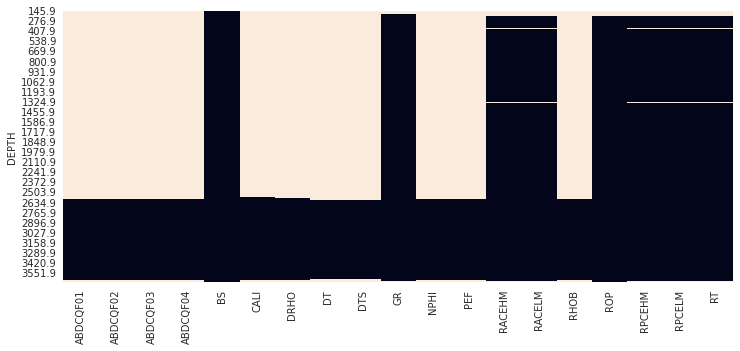

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(log_df.isnull(), cbar=False)
plt.show()

In [ ]:
log_df.columns

Index(['ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO',
       'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP',
       'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

In [ ]:
log_df.reset_index(inplace=True)

In [ ]:
log_df.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
log_df.describe()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
count,35361.000000,10502.000000,10502.000000,10502.000000,10504.000000,35361.000000,10745.000000,10647.000000,10224.000000,10214.000000,34671.000000,10524.000000,10551.000000,34211.000000,34211.000000,10551.000000,34477.000000,34211.000000,34211.000000,34211.000000
mean,1913.900000,2.481041,2.484954,2.488893,2.484137,17.887317,8.608636,0.049923,76.677725,140.353716,58.276629,0.170238,6.813543,1.868242,1.796210,2.482658,30.214852,3.597447,1.667340,3.597447
std,1020.798577,0.140198,0.141846,0.143723,0.140472,7.440822,0.062221,0.013428,12.817042,25.740441,42.940264,0.100083,1.065816,29.837728,17.207245,0.140218,20.721234,261.345310,1.914388,261.345310
min,145.900000,1.933100,1.952400,1.942200,1.967300,8.500000,7.938000,-0.103500,56.382300,96.900700,0.149100,0.029000,4.297800,0.195500,0.234900,1.980600,0.005100,0.142500,0.128200,0.142500
25%,1029.900000,2.405325,2.408700,2.411400,2.409400,8.500000,8.578100,0.045400,67.869250,121.976725,29.909850,0.103300,6.058200,0.820700,0.769800,2.405950,19.951800,0.761300,0.724700,0.761300
50%,1913.900000,2.533700,2.539050,2.542050,2.538100,17.500000,8.624900,0.049900,73.309500,133.162700,57.363200,0.144050,7.141300,1.196900,1.159400,2.536000,27.125700,1.179100,1.145100,1.179100
75%,2797.900000,2.581475,2.586300,2.591300,2.584700,26.000000,8.625000,0.055200,82.502475,146.433100,79.242850,0.214200,7.688600,1.880300,1.751400,2.583500,33.260000,1.998600,1.870950,1.998600
max,3681.900000,3.164700,3.065600,3.268300,2.939700,36.000000,9.741100,0.127500,116.231600,217.969900,587.017200,0.593200,10.758300,5464.369100,2189.603000,2.931500,151.127400,46224.449200,159.890700,46224.449200


In [ ]:
log_df.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB',
       'ROP', 'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

# Identify the lithology and reservoir.

* GR helps to distinguish between shale rocks and non shale rocks.

*  In a few reservoirs, the GR is not a reliable indicator of sand, due to the presence in sands of radioactive minerals. 

* SP helps to determine permeable zones in th formation, since shale is impermeable we can also use SP to identify lithology.

* It will be assumed that one is dealing with clastic reservoirs. 

*  The most reliable indicator of reservoir rock will be from the behavior of the density/neutron logs, with the density moving to the left (lower density) and touching or crossing the neutron curve. 

We will work through the safest means of identifying a reservoir through the use of IGR or Shale volume.

# **Produce VSHALE and VCLAY log from GR**

We calculate shale volume (VSH) using Gamma Ray (GR), by this formula:
$$IGR=\frac{GR-GR_{min}}{GR_{max}-GR_{min}}$$

Larionov (1969) for tertiary rocks:
$$VSH=0.083(23.7 * IGR-1)$$

Larionov (1969) for older rocks:
$$VSH=0.33(22 * IGR-1)$$


```
```

**Clay Volume**:
$$VCL=\frac{0.5*VSH}{1.5-VSH}$$

```
```

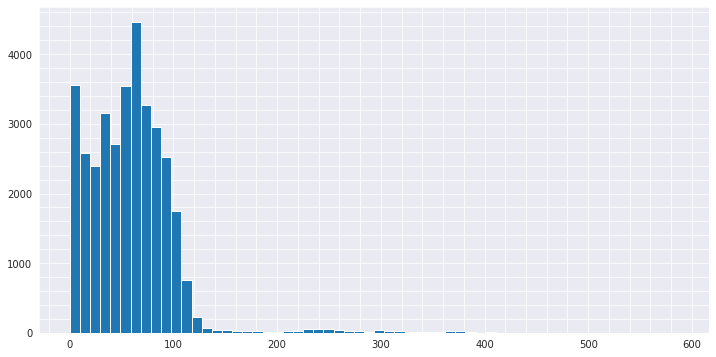

In [ ]:
plt.figure(figsize=(12,6))
log_df['GR'].hist(bins=60)
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

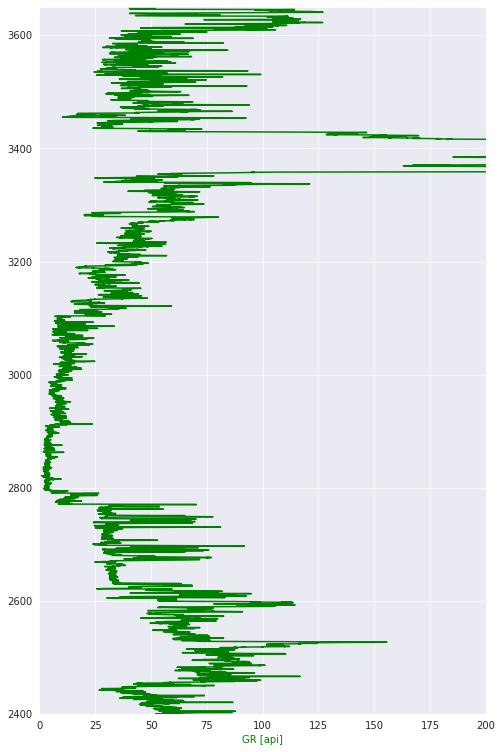

In [ ]:
fig, ax = plt.subplots(figsize=(8,13))

ax.plot('GR', 'DEPTH',  c='g', data=log_df)
ax.set_xlabel('GR [api]', c='g')
ax.invert_yaxis()
ax.set_ylim(2400, 3650)
ax.set_xlim(0, 200)

plt.show()

In [ ]:
Vsh = (log_df['GR'] - 10)/(120-10)
log_df['Vsh'] = Vsh

In [ ]:
log_df.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB',
       'ROP', 'RPCEHM', 'RPCELM', 'RT', 'Vsh'],
      dtype='object')

In [ ]:
log_df.describe()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT,Vsh
count,35361.000000,10502.000000,10502.000000,10502.000000,10504.000000,35361.000000,10745.000000,10647.000000,10224.000000,10214.000000,34671.000000,10524.000000,10551.000000,34211.000000,34211.000000,10551.000000,34477.000000,34211.000000,34211.000000,34211.000000,34671.000000
mean,1913.900000,2.481041,2.484954,2.488893,2.484137,17.887317,8.608636,0.049923,76.677725,140.353716,58.276629,0.170238,6.813543,1.868242,1.796210,2.482658,30.214852,3.597447,1.667340,3.597447,0.438878
std,1020.798577,0.140198,0.141846,0.143723,0.140472,7.440822,0.062221,0.013428,12.817042,25.740441,42.940264,0.100083,1.065816,29.837728,17.207245,0.140218,20.721234,261.345310,1.914388,261.345310,0.390366
min,145.900000,1.933100,1.952400,1.942200,1.967300,8.500000,7.938000,-0.103500,56.382300,96.900700,0.149100,0.029000,4.297800,0.195500,0.234900,1.980600,0.005100,0.142500,0.128200,0.142500,-0.089554
25%,1029.900000,2.405325,2.408700,2.411400,2.409400,8.500000,8.578100,0.045400,67.869250,121.976725,29.909850,0.103300,6.058200,0.820700,0.769800,2.405950,19.951800,0.761300,0.724700,0.761300,0.180999
50%,1913.900000,2.533700,2.539050,2.542050,2.538100,17.500000,8.624900,0.049900,73.309500,133.162700,57.363200,0.144050,7.141300,1.196900,1.159400,2.536000,27.125700,1.179100,1.145100,1.179100,0.430575
75%,2797.900000,2.581475,2.586300,2.591300,2.584700,26.000000,8.625000,0.055200,82.502475,146.433100,79.242850,0.214200,7.688600,1.880300,1.751400,2.583500,33.260000,1.998600,1.870950,1.998600,0.629480
max,3681.900000,3.164700,3.065600,3.268300,2.939700,36.000000,9.741100,0.127500,116.231600,217.969900,587.017200,0.593200,10.758300,5464.369100,2189.603000,2.931500,151.127400,46224.449200,159.890700,46224.449200,5.245611


In [ ]:
def doub_plot(data, min_depth=None, max_depth=None):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,15), sharey=False)

  for axes in ax:
    axes.get_xaxis().set_visible(False)
    axes.invert_yaxis()
    if min_depth is not None:
      axes.set_ylim (max_depth, min_depth)

  # 1st track 
  gr = ax[0].twiny()
  gr.plot('GR', 'DEPTH',  c='y', data=data)
  gr.spines['top'].set_position(('outward',20))
  gr.spines['top'].set_color('y')
  gr.set_xlabel('GR [api]', c='y')
  gr.set_xlim(0, 300)

  
  
  # 2nd track 
  nl = ax[1].twiny()
  nl.minorticks_on()
  nl.plot('NPHI', 'DEPTH',  c='r', data=data)
  nl.spines['top'].set_position(('outward',20))
  nl.spines['top'].set_color('r')
  nl.set_xlabel('NPHI [decp]', c='r')
  nl.set_xlim(0.45, -0.15)
  nl.grid(b=True, which='major', color='k', linestyle='--')
  nl.grid(b=True, which='minor', color='grey', linestyle=':')
  nl.xaxis.set_major_locator(plt.MultipleLocator(15))

  de = ax[1].twiny()
  de.plot('RHOB', 'DEPTH', c='g', data=data)
  de.spines['top'].set_position(('outward',60))
  de.spines['top'].set_color('g')
  de.set_xlabel('RHOB [g/cc]', c='g')
  de.set_xlim(1.95, 2.95)
  de.xaxis.set_major_locator(plt.MultipleLocator(0.4))

  # 3rD track 
  vsh = ax[2].twiny()
  vsh.plot('Vsh', 'DEPTH',  c='b', data=data)
  vsh.spines['top'].set_position(('outward',20))
  vsh.spines['top'].set_color('b')
  vsh.set_xlabel('Vsh', c='b')
  vsh.set_xlim(0, 1)

  plt.tight_layout(pad=2, h_pad=10)

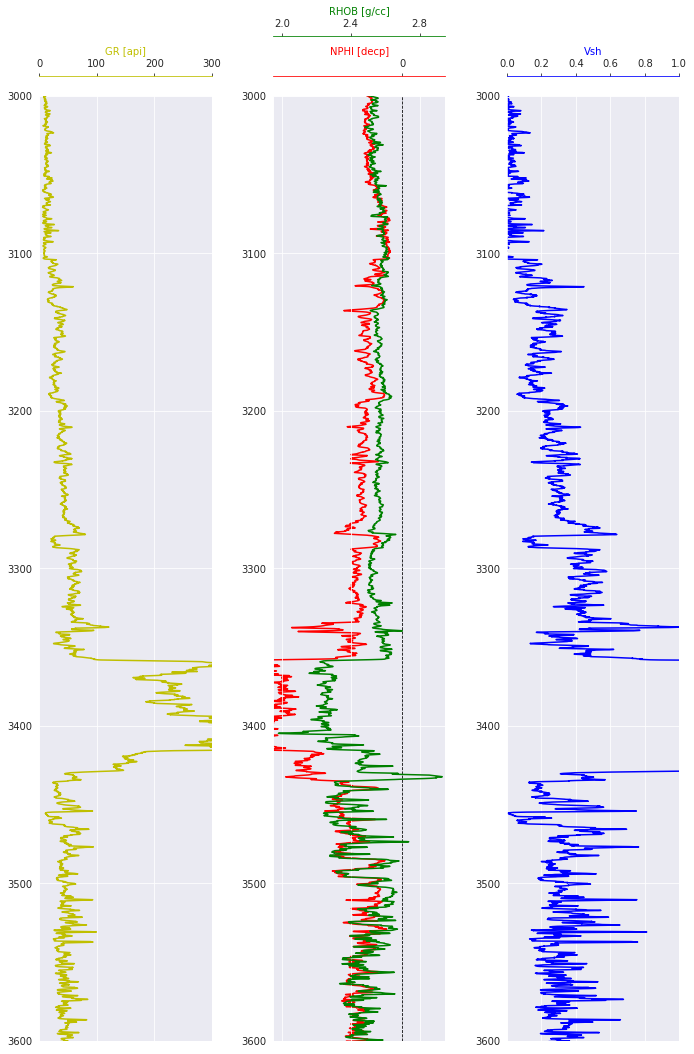

In [ ]:
doub_plot(log_df, 3000, 3600)

 By comparing Vsh with the density/neutron response, determine a value of Vsh to use as a cutoff. Typically 50% is used.


#  IDENTIFYING THE FLUID TYPE AND CONTACT

*  If regional information is available regarding the positions of any gas/oil contact (GOC) or oil/water contact (OWC), then convert these subsea depths into measured depths in the current well and mark them on the logs. 

In [ ]:
def doub_plot(data, min_depth=None, max_depth=None):
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,20), sharey=False)

  for axes in ax:
    axes.get_xaxis().set_visible(False)
    axes.invert_yaxis()
    if min_depth is not None:
      axes.set_ylim (max_depth, min_depth)

  # 1st track 
  gr = ax[0].twiny()
  gr.plot('GR', 'DEPTH',  c='y', data=data)
  gr.spines['top'].set_position(('outward',20))
  gr.spines['top'].set_color('y')
  gr.set_xlabel('GR [api]', c='y')
  gr.set_xlim(0, 350)

  
  
  # 2nd track 
  nl = ax[1].twiny()
  nl.minorticks_on()
  nl.plot('NPHI', 'DEPTH',  c='r', data=data)
  nl.spines['top'].set_position(('outward',20))
  nl.spines['top'].set_color('r')
  nl.set_xlabel('NPHI [decp]', c='r')
  nl.set_xlim(0.45, -0.15)
  nl.grid(b=True, which='major', color='k', linestyle='--')
  nl.grid(b=True, which='minor', color='grey', linestyle=':')

  de = ax[1].twiny()
  de.plot('RHOB', 'DEPTH', c='b', data=data)
  de.spines['top'].set_position(('outward',60))
  de.spines['top'].set_color('b')
  de.set_xlabel('RHOB [g/cc]', c='b')
  de.set_xlim(1.95, 2.95)
  de.xaxis.set_major_locator(plt.MultipleLocator(0.4))

  # 3rD track 
  vsh = ax[2].twiny()
  vsh.plot('Vsh', 'DEPTH',  c='g', data=data)
  vsh.spines['top'].set_position(('outward',20))
  vsh.spines['top'].set_color('g')
  vsh.set_xlabel('Vsh', c='g')
  vsh.set_xlim(0, 1)


  # 4th track
  ax[3].minorticks_on()
  ax[3].grid(b=True, which='major', color='black', linestyle='--')
  ax[3].grid(b=True, which='minor', color='grey', linestyle=':') 
  rt = ax[3].twiny()
  rt.set_xlim(0.2, 2000)
  rt.spines['top'].set_position(('outward',20))
  rt.spines['top'].set_color('c')
  rt.semilogx(data.RT, data.DEPTH, linewidth=1, c='c', )
  rt.set_xlabel('RT [ohm.m]',color='c')    
  rt.tick_params(axis='x', colors='c')
  rt.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=3))
  rt.grid(b=True, which='major', color='black', linestyle='--')
  rt.grid(b=True, which='minor', color='grey', linestyle=':') 

  
  plt.tight_layout(pad=2, h_pad=10)

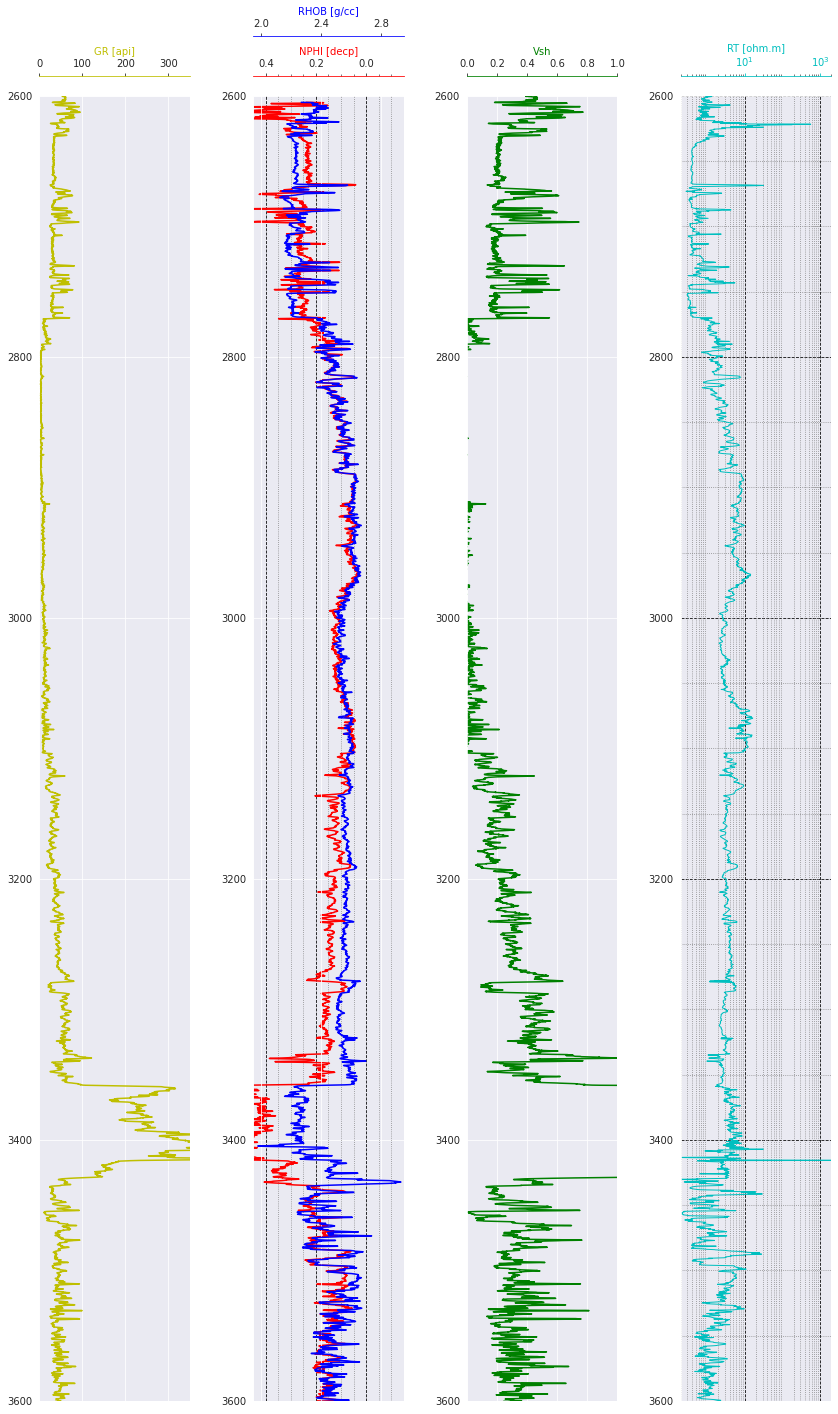

In [ ]:
doub_plot(log_df, 2600, 3600)

 However, some hydrocarbon/water zones will not exhibit such behavior, the reasons being:
* When the formation-water salinity is very high, the resistivity may also drop in clean sands. 
* In shaly sand zones having a high proportion of conductive dispersed shales, the resistivity may also fail to rise in reservoir zones. 
* If the sands are thinly laminated between shales, the deep resistivity may not be able to “resolve” the sands, and the resistivity may remain low. 
* If the well has been drilled with very heavy overbalance, invasion may be such as to completely mask the hydrocarbon response. 
* When the formation water is very fresh (high Rw), the resistivity may Mae West even in water-bearing zones.
